![fatigued-truck-driver-1.gif](attachment:fatigued-truck-driver-1.gif)

## Driver drowsiness detection is a car safety technology which helps prevent accidents caused by the driver getting drowsy. Various studies have suggested that around 20% of all road accidents are fatigue-related, up to 50% on certain roads.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import os
os.chdir('/content/drive/MyDrive/Image processing-project') 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# labels

In [ ]:
labels = os.listdir("/content/drive/MyDrive/Image processing-project")

In [ ]:
labels

# visualize random 1 image

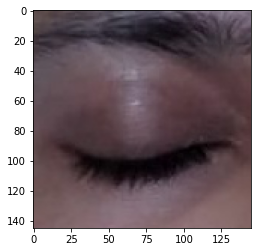

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("archive/train/Closed/_0.jpg"))

# image array

In [ ]:
a = plt.imread("archive/train/yawn/10.jpg")

# image shape

In [ ]:
a.shape

# visualize yawn image. 
# Here background is unnecessary. we need only face image array

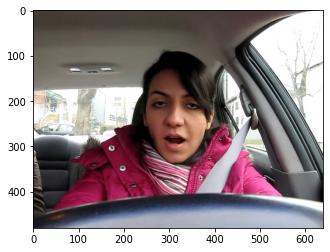

In [ ]:
plt.imshow(plt.imread("archive/train/yawn/10.jpg"))

# for yawn and not_yawn. Take only face

In [ ]:
def face_for_yawn(direc="archive/train", face_cas_path="haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


# for closed and open eye

In [ ]:
def get_data(dir_path="archive/train/", face_cas="haarcascade_frontalface_default.xml", eye_cas="haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [ ]:
data_train = get_data()

2
3


# extend data and convert array

In [ ]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

# new variable to store

In [ ]:
new_data = append_data()

0
1
2
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


# separate label and features

In [ ]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

# reshape the array

In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

# LabelBinarizer

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

# label array

In [ ]:
y = np.array(y)

# train test split

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# length of X_test

In [ ]:
len(X_test)

578

# Not necessary, only use to matching with my pc version

In [ ]:
# !pip install tensorflow==2.3.1
# !pip install keras==2.4.3

# import some dependencies

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# tensorflow version

In [ ]:
tf.__version__

# keras version

In [ ]:
import keras
keras.__version__

# Data Augmentation

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model

In [ ]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 143, 143, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        1

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
43/43 [==============================] - 42s 187ms/step - loss: 1.3378 - accuracy: 0.3699 - val_loss: 0.7917 - val_accuracy: 0.6678
Epoch 2/50
43/43 [==============================] - 7s 173ms/step - loss: 0.6520 - accuracy: 0.7221 - val_loss: 0.4029 - val_accuracy: 0.8374
Epoch 3/50
43/43 [==============================] - 7s 169ms/step - loss: 0.4153 - accuracy: 0.8082 - val_loss: 0.2842 - val_accuracy: 0.8893
Epoch 4/50
43/43 [==============================] - 7s 171ms/step - loss: 0.3681 - accuracy: 0.8298 - val_loss: 0.2865 - val_accuracy: 0.8754
Epoch 5/50
43/43 [==============================] - 7s 171ms/step - loss: 0.3151 - accuracy: 0.8595 - val_loss: 0.2165 - val_accuracy: 0.9204
Epoch 6/50
43/43 [==============================] - 7s 171ms/step - loss: 0.3021 - accuracy: 0.8792 - val_loss: 0.1904 - val_accuracy: 0.9273
Epoch 7/50
43/43 [==============================] - 8s 179ms/step - loss: 0.2476 - accuracy: 0.9025 - val_loss: 0.1719 - val_accuracy: 0.9325
Epoch

# history

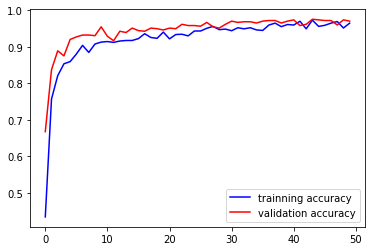

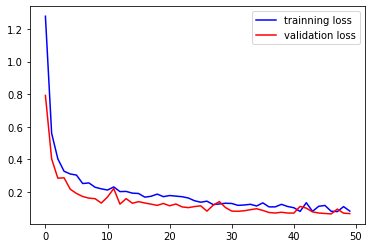

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# save model

In [ ]:
model.save("drowiness_new6.h5")

In [ ]:
model.save("drowiness_new6.model")

INFO:tensorflow:Assets written to: drowiness_new6.model/assets


# Prediction

In [ ]:
prediction = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
prediction

array([3, 3, 2, 3, 1, 3, 3, 2, 1, 2, 3, 3, 3, 2, 2, 2, 3, 0, 0, 3, 2, 3,
       2, 1, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 0, 3, 3, 2, 1, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 2, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 0, 3, 3, 1, 2, 2, 3,
       2, 3, 2, 3, 1, 3, 3, 3, 2, 0, 1, 3, 1, 3, 2, 0, 3, 2, 2, 2, 2, 0,
       3, 3, 2, 3, 3, 3, 1, 1, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 3, 1, 2, 2,
       1, 1, 2, 1, 0, 3, 3, 3, 2, 2, 0, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 3,
       1, 3, 1, 2, 3, 3, 2, 1, 2, 2, 2, 1, 3, 3, 3, 3, 2, 0, 3, 3, 3, 3,
       3, 0, 1, 0, 3, 1, 3, 2, 2, 3, 1, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 3,
       2, 2, 0, 2, 3, 1, 2, 1, 3, 2, 3, 0, 2, 0, 1, 3, 2, 2, 3, 3, 3, 0,
       3, 2, 3, 1, 2, 0, 0, 1, 2, 3, 2, 0, 3, 1, 2, 2, 2, 2, 1, 3, 1, 2,
       1, 0, 2, 3, 3, 3, 3, 0, 1, 2, 1, 0, 3, 3, 1, 3, 3, 0, 3, 3, 0, 0,
       0, 1, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 0, 3, 3, 2, 2,
       3, 2, 2, 0, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 1, 0, 3, 3, 3, 3, 2,
       2, 1, 2, 2, 2, 3, 2, 0, 2, 2, 1, 3, 2, 2, 1,

# classification report

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.93      0.84      0.88        63
     no_yawn       0.85      0.93      0.89        74
      Closed       0.97      0.97      0.97       215
        Open       0.98      0.97      0.97       226

    accuracy                           0.95       578
   macro avg       0.93      0.93      0.93       578
weighted avg       0.95      0.95      0.95       578



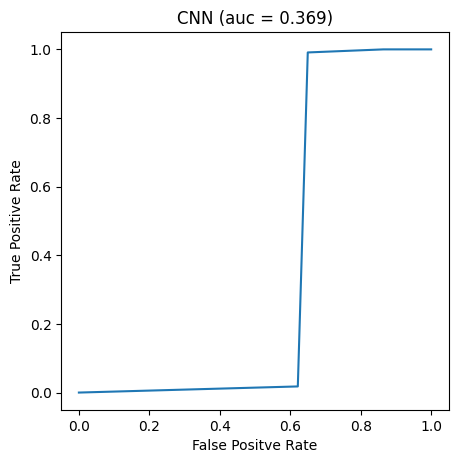

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc

cnn_fpr1, cnn_tpr1, _ = roc_curve(np.argmax(y_test[0::2], axis=1),prediction[0::2],pos_label=2)
auc_cnn1 = auc(cnn_fpr1,cnn_tpr1)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(cnn_fpr1,cnn_tpr1,linestyle = '-')
plt.title(label='CNN (auc = %0.3f)' % auc_cnn1)
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')

plt.show()


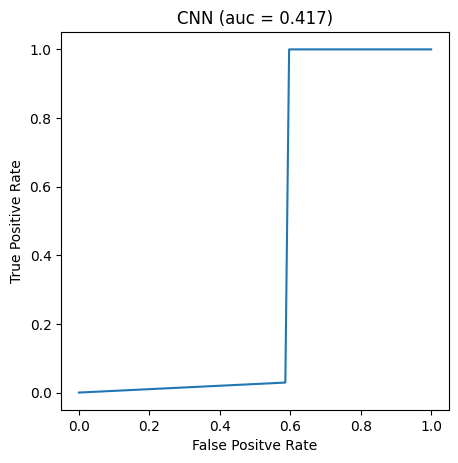

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,auc

cnn_fpr2, cnn_tpr2, _ = roc_curve(np.argmax(y_test[1::2], axis=1),prediction[1::2],pos_label=2)
auc_cnn2 = auc(cnn_fpr2,cnn_tpr2)

plt.figure(figsize=(5,5),dpi=100)
plt.plot(cnn_fpr2,cnn_tpr2,linestyle = '-')
plt.title(label='CNN (auc = %0.3f)' % auc_cnn2)
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')

plt.show()


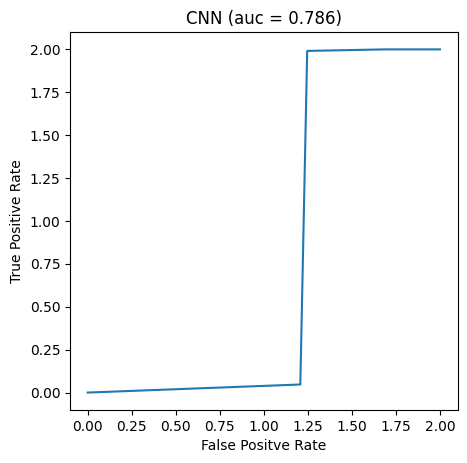

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(cnn_fpr1+cnn_fpr2,cnn_tpr1+cnn_tpr2,linestyle = '-')
plt.title(label='CNN (auc = %0.3f)' % (auc_cnn1+auc_cnn2))
plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
index =['0 - yawn','1 - no_yawn', '2- closed ', '3- open']

df = pd.DataFrame({'0 - yawn':[54,6,0,3],
                   '1 - no_yawn':[3,71,0,0],
                  '2- closed':[0,0,207,8],
                  '3- open':[0,0,1,225]},
                 index = index)


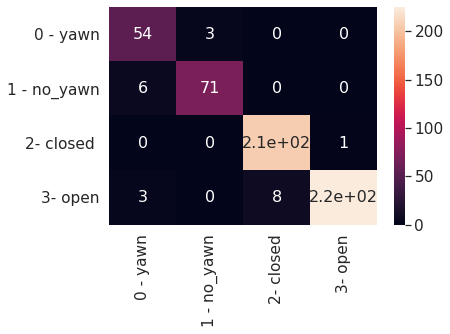

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df, annot=True, annot_kws={"size": 16}) # font size

plt.show()


# predicting function

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("./drowiness_new6.h5")

# Prediction 
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [ ]:
# prepare("../input/drowsiness-dataset/train/no_yawn/1068.jpg")
prediction = model.predict([prepare("../input/drowsiness-dataset/train/no_yawn/1067.jpg")])
np.argmax(prediction)

In [ ]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Closed/_101.jpg")])
np.argmax(prediction)

In [ ]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/Open/_104.jpg")])
np.argmax(prediction)

In [ ]:
prediction = model.predict([prepare("../input/drowsiness-dataset/train/yawn/113.jpg")])
np.argmax(prediction)

# If you like please upvote